## Helpful links
follow this (signal processing portion): https://app.box.com/file/1283099900531

signal filtering in matlab: https://www.mathworks.com/help/dsp/ug/cochlear-implant-speech-processor.html

Python toolbox: https://github.com/jabeim/AB-Generic-Python-Toolbox/blob/master/Documentation%20__draft__v0.1.docx

Google research code: https://gitlab.ilabt.imec.be/ahadifar/google-research/-/tree/master/cochlear_implant

python librosa library 

frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/

paper on mimicking the human ear https://ecs.utdallas.edu/loizou/cimplants/tutorial/introci.pdf

rms energy https://www.analyticsvidhya.com/blog/2022/05/comparison-of-the-rms-energy-and-the-amplitude-envelope/

construct sinusoid https://stackoverflow.com/questions/48043004/how-do-i-generate-a-sine-wave-using-python

adding noise https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

spectrogram https://www.pnsn.org/spectrograms/what-is-a-spectrogram

plot spectogram https://stackoverflow.com/questions/48598994/scipy-signal-spectrogram-compared-to-matplotlib-pyplot-specgram

frame (2ms) overlap https://stackoverflow.com/questions/66887965/python-audio-segmentation-with-overlapping-and-hamming-windows

speech intelligibility: https://colab.research.google.com/drive/1bAnDpUUx5-BYkL3l3ukNVVnsLzEhy-ds#scrollTo=Nz7MiXRIxiEK

normalize volume: https://stackoverflow.com/questions/42492246/how-to-normalize-the-volume-of-an-audio-file-in-python

reverb in python: https://www.youtube.com/watch?v=q63ypxds0cY, https://stackoverflow.com/questions/58345278/how-to-add-a-ratio-parameter-to-scipy-signal-convolution-in-python , https://stackoverflow.com/questions/48006003/reverb-effect-with-scipy

understand reverb with convolution: https://gormatevosyan.com/convolutional-reverb-how-and-why-does-it-work/

rt60, c50: https://www.acousticbulletin.com/room-acoustic-descriptors-rt-c50-and-gain/

simulate room acoustics: https://colab.research.google.com/drive/1V_t3Eq-Ue_5Tqs3LWFx36qf0zt_2p0xW#scrollTo=-dwC_jd1mb8f, https://www.youtube.com/watch?v=c3DTtc--_F4 

python implementation of stoi: https://github.com/mpariente/pystoi

pyroomacoustics documentation https://pyroomacoustics.readthedocs.io/en/pypi-release/pyroomacoustics.room.html

In [1]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from pystoi import stoi # speech intelligibility

In [2]:
# frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/
FREQUENCIES_FOR_5_CHANNELS_TABLE_1 = [350, 607, 1053,1827,3170, 8700]
FREQUENCIES_FOR_16_CHANNELS_TABLE_1 = [250, 416, 494, 587, 697, 828, 983, 1168, 1387, 1648, 1958, 2326, 2762, 3281, 3898, 4630, 8700]
FREQUENCIES_FOR_6_CHANNELS_TABLE_2 = [188, 563, 1063, 1813, 2938, 4813, 7938]
FREQUENCIES_FOR_22_CHANNELS_TABLE_2 = [188, 313, 438, 563, 688, 813, 938, 1063, 1188, 1438, 1688, 1938, 2313, 2688, 3188, 3688, 4313, 5603, 5938, 6938, 7938]

In [188]:
wav_file = "CU300111.wav" #"LL-Q1860_(eng)-Vealhurl-cosmos2.wav"
frequency_ranges = FREQUENCIES_FOR_22_CHANNELS_TABLE_2 ### CHANGE THIS TO which you want
LEN_TIME_QUANTIZED_MS = 8
OVERLAP_MS = 0

In [189]:
# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read(wav_file)
times = np.arange(len(data))/sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(data.shape)

print("sample_rate:", str(sample_rate) + " samples/sec")

(42147,)
sample_rate: 16000 samples/sec


In [190]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

In [191]:
'''
the rms energy values will be the amplitude of the sinusoid over 8ms
the frequency of the 8ms should be the average frequency in that range.
'''

def create_sinusoid(average_frequency, amplitude, t):
    '''
    average_frequency (int): should be the average frequency of that channel
    t (int): should be the time of the generated sound in seconds
    sample_rate (int): should be the sample rate of the audio file
    sample_rate (float): should be the amplitude of the sound, in this case the rms energy value
    ''' 
    f = average_frequency

    samples = np.linspace(0, t, int(sample_rate*t), endpoint=False)

    signal = np.sin(2 * np.pi * f * samples)

    signal *= amplitude # ?? should multiply by the rms energy

    return signal

# Simulate CI Audio Processing Pipeline

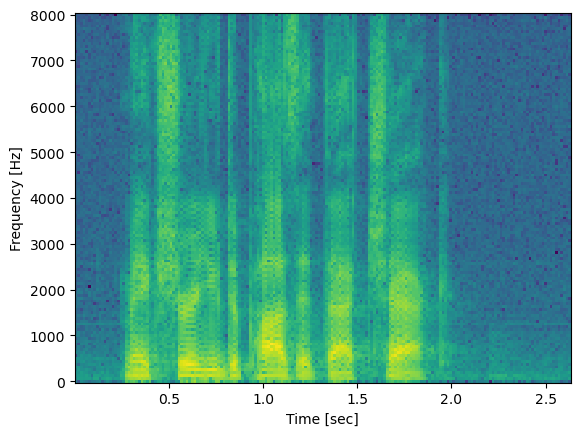

In [192]:
spectrogram_data = scipy.signal.spectrogram(data, sample_rate)

f, t, Sxx = scipy.signal.spectrogram(data, sample_rate)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [193]:
data.shape

(42147,)

In [194]:
# bandpass the data
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))

In [195]:
bandpassed_frequencies_low_to_high

[array([-4.79535028, -5.64895228, -6.44391277, ...,  0.02783333,
         0.02696272,  0.02565728]),
 array([0.90583455, 1.00700484, 1.10082494, ..., 0.01051366, 0.01015199,
        0.0094601 ]),
 array([1.96484962, 2.5315115 , 3.00436432, ..., 0.02549119, 0.02440984,
        0.02230555]),
 array([-1.3969316 , -1.31041309, -1.14097182, ...,  0.01219245,
         0.00974467,  0.00707111]),
 array([ 0.30414139, -0.03648869, -0.37533716, ...,  0.00364335,
         0.0043195 ,  0.00443197]),
 array([0.54194368, 1.40879471, 2.11176325, ..., 0.01001857, 0.00811863,
        0.00559693]),
 array([-6.62193517e-01,  7.76086337e-01,  2.10548429e+00, ...,
         5.57980954e-03,  2.93096583e-03,  4.00597009e-04]),
 array([ 3.47093834e-02,  4.67162567e-01,  8.25878394e-01, ...,
         9.22649236e-04, -2.71081799e-04, -1.14922223e-03]),
 array([ 0.56820673, -1.24925358, -2.75374983, ...,  0.05577938,
         0.07298289,  0.06850187]),
 array([-0.35830493,  0.2298407 ,  0.69095454, ..., -0.041783

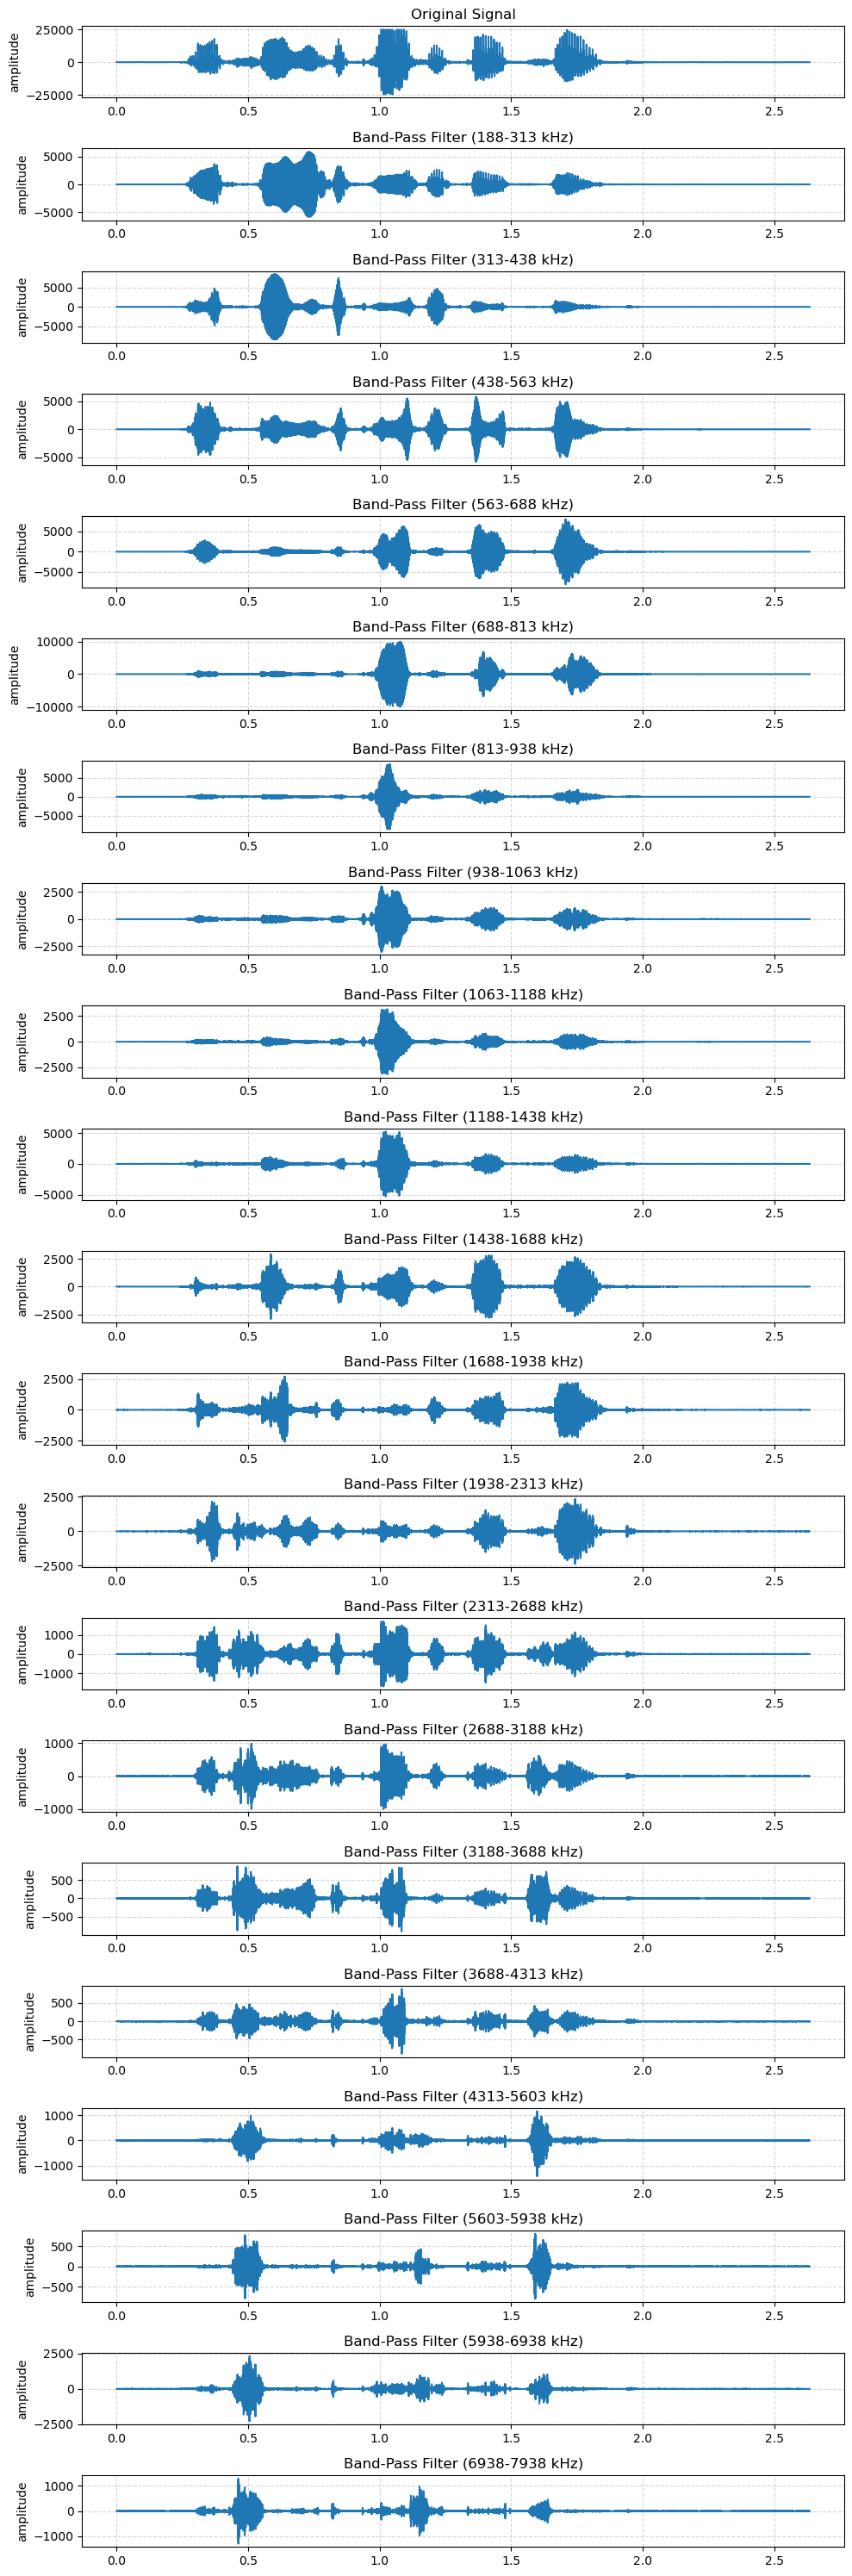

In [196]:
# display result Bandpassed
fig, axes = plt.subplots(len(bandpassed_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data) # plot entire graph
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet

# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Band-Pass Filter ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, bandpassed_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()

plt.show()

In [197]:
# rectify/get the envelope of each channel
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))

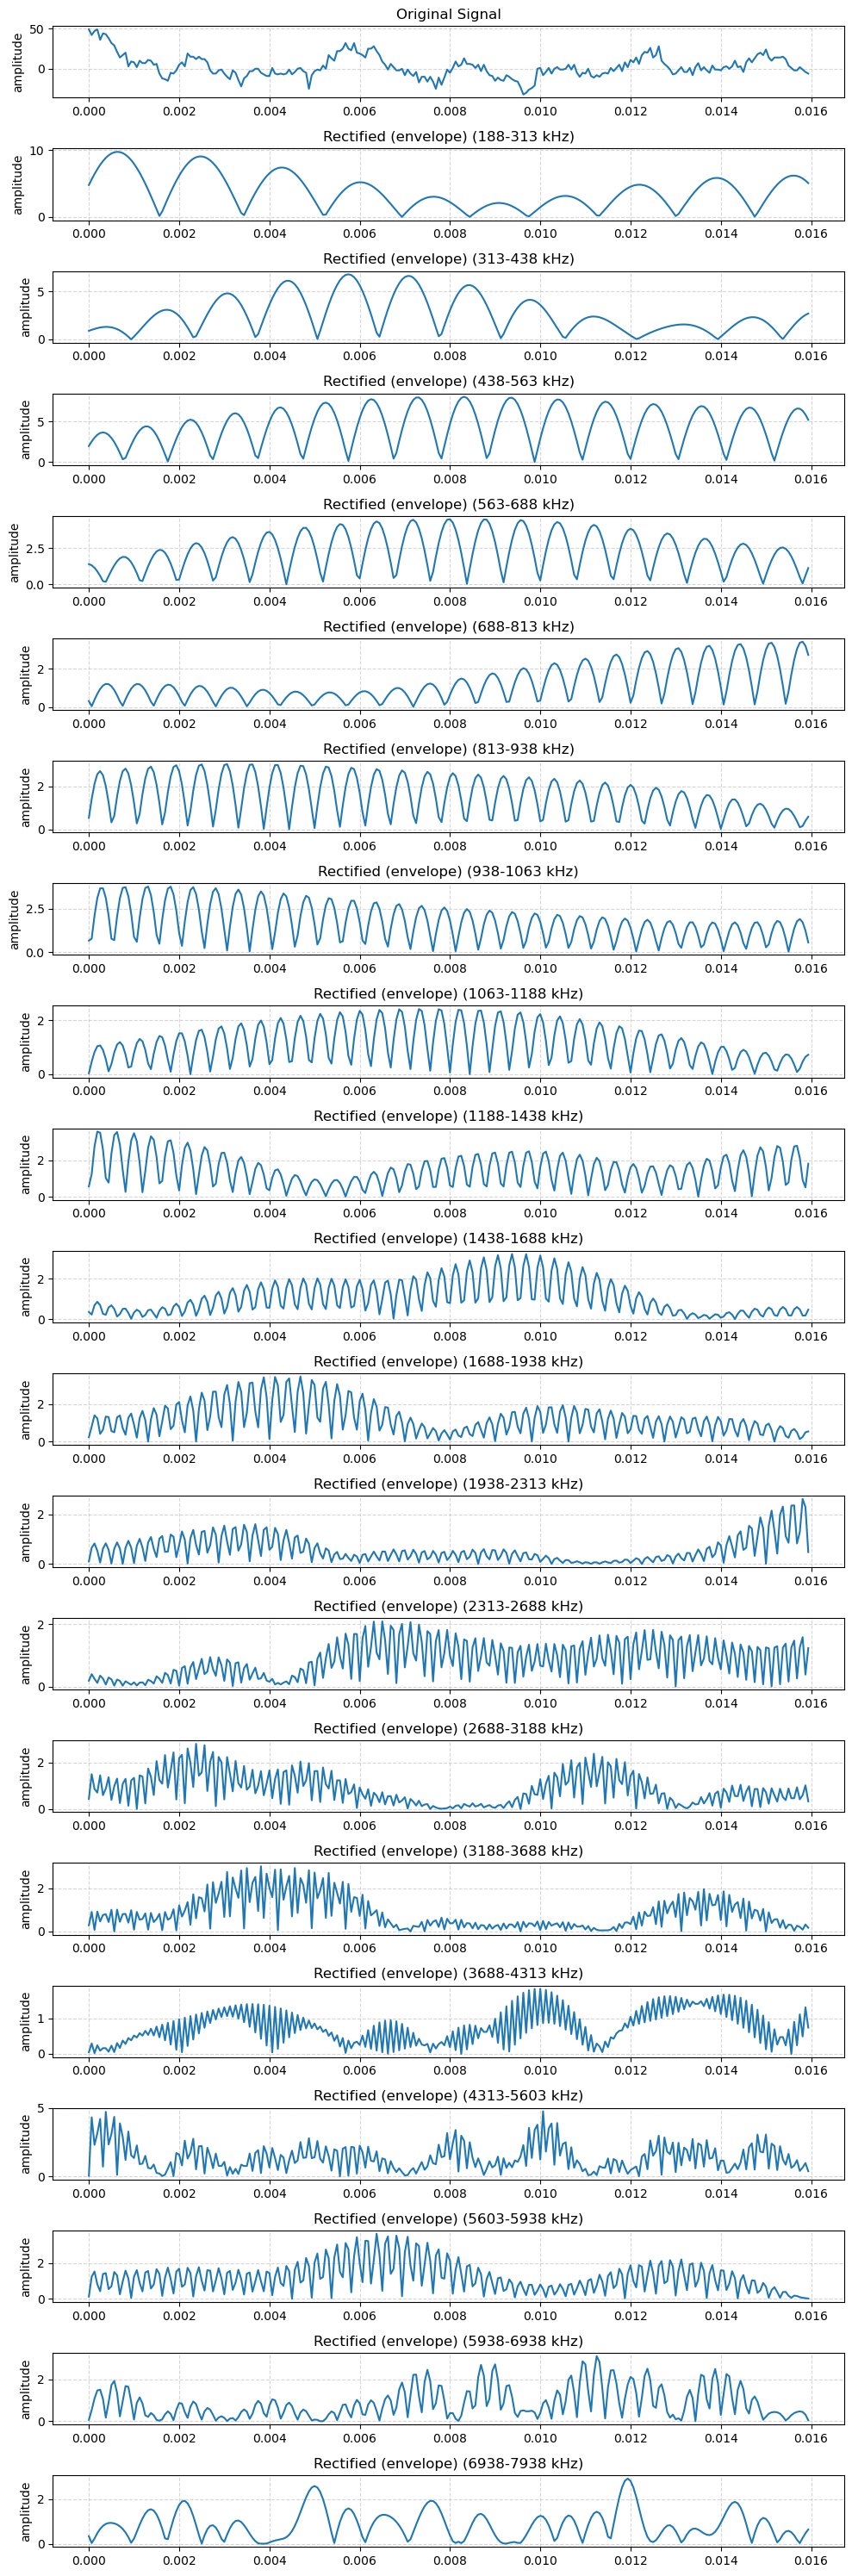

In [198]:
# display result Rectified
fig, axes = plt.subplots(len(enveloped_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times[:frame_step*2], data[:frame_step*2])
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Rectified (envelope) ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times[:frame_step*2], enveloped_frequencies_low_to_high[indx][:frame_step*2])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

In [199]:
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

In [200]:
len(hamming)==frame_step

False

In [201]:
'''
# with hamming. doesn't make a difference here
hamming = scipy.signal.windows.hamming(frame_step, sym=True) # frame_step or overlap_step??
for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(hamming*frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))


'''
for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))


In [202]:
len(rms_energy_values[0])

330

In [203]:
rms_energy_values

[array([5.50145233e+00, 3.35496990e+00, 7.86547431e+00, 8.88491845e+00,
        2.94111068e+00, 3.60148893e+00, 4.79230735e+00, 8.09874470e+00,
        7.78137399e+00, 6.19428140e+00, 3.53547573e+00, 4.14142505e+00,
        3.15755016e+00, 1.87880508e+00, 4.21732219e+00, 5.45504470e+00,
        5.74332617e+00, 5.95930568e+00, 6.75098650e+00, 9.84895619e+00,
        5.18821978e+00, 7.53451641e+00, 9.59025186e+00, 3.01994819e+00,
        6.17565217e+00, 3.72521944e+00, 7.07849479e+00, 7.09946963e+00,
        8.83841798e+00, 9.43089023e+00, 1.98019431e+01, 2.76249376e+01,
        3.62769060e+01, 1.67347482e+02, 4.26327950e+02, 6.97258336e+02,
        9.53405967e+02, 1.06700816e+03, 1.47206442e+03, 1.59211642e+03,
        1.77125606e+03, 1.84162068e+03, 1.83301965e+03, 2.03833135e+03,
        2.06101430e+03, 1.99805288e+03, 2.28028859e+03, 2.08211905e+03,
        1.00709489e+03, 9.18894107e+02, 1.69771510e+02, 1.68333237e+02,
        2.11380770e+02, 1.73625235e+02, 1.94242250e+02, 1.791282

In [204]:
create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000)

array([ 0.        ,  0.36225507, -0.70693724,  1.01732607, -1.27836469,
        1.47739016, -1.60474783,  1.65425961, -1.62352369,  1.51403106,
       -1.33109318,  1.08358432, -0.78351108,  0.44542991, -0.08574106,
       -0.27810707,  0.62846429, -0.94833488,  1.222202  , -1.43678041,
        1.58166099, -1.64981561,  1.63793811, -1.54660466,  1.38024583,
       -1.14693163,  0.85798009, -0.52740815,  0.17125179,  0.19321195,
       -0.54830304,  0.87679608, -1.16275598,  1.3923109 , -1.55432518,
        1.64093955, -1.64795238,  1.57502347, -1.42569059,  1.20719783,
       -0.93014422,  0.60796957, -0.25630247, -0.1077978 ,  0.46666882,
       -0.80290186,  1.10018635, -1.34410108,  1.52281382, -1.62765527,
        1.65353959, -1.59921114,  1.46730537, -1.26422101,  0.99980962,
       -0.68689773,  0.34066461,  0.02209406, -0.38378095,  0.72685073,
       -1.03466117,  1.29228047, -1.48721159,  1.60999846, -1.65468473,
        1.61910268, -1.50497839,  1.31784799, -1.06678913,  0.76

In [205]:
# generate sinusoid (represents current?)
signal = []
hamming = scipy.signal.windows.hamming(overlap_step, sym=True) # frame_step or overlap_step??

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(hamming*create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    hamming = scipy.signal.windows.hamming(overlap_step, sym=True) # frame_step or overlap_step??
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    

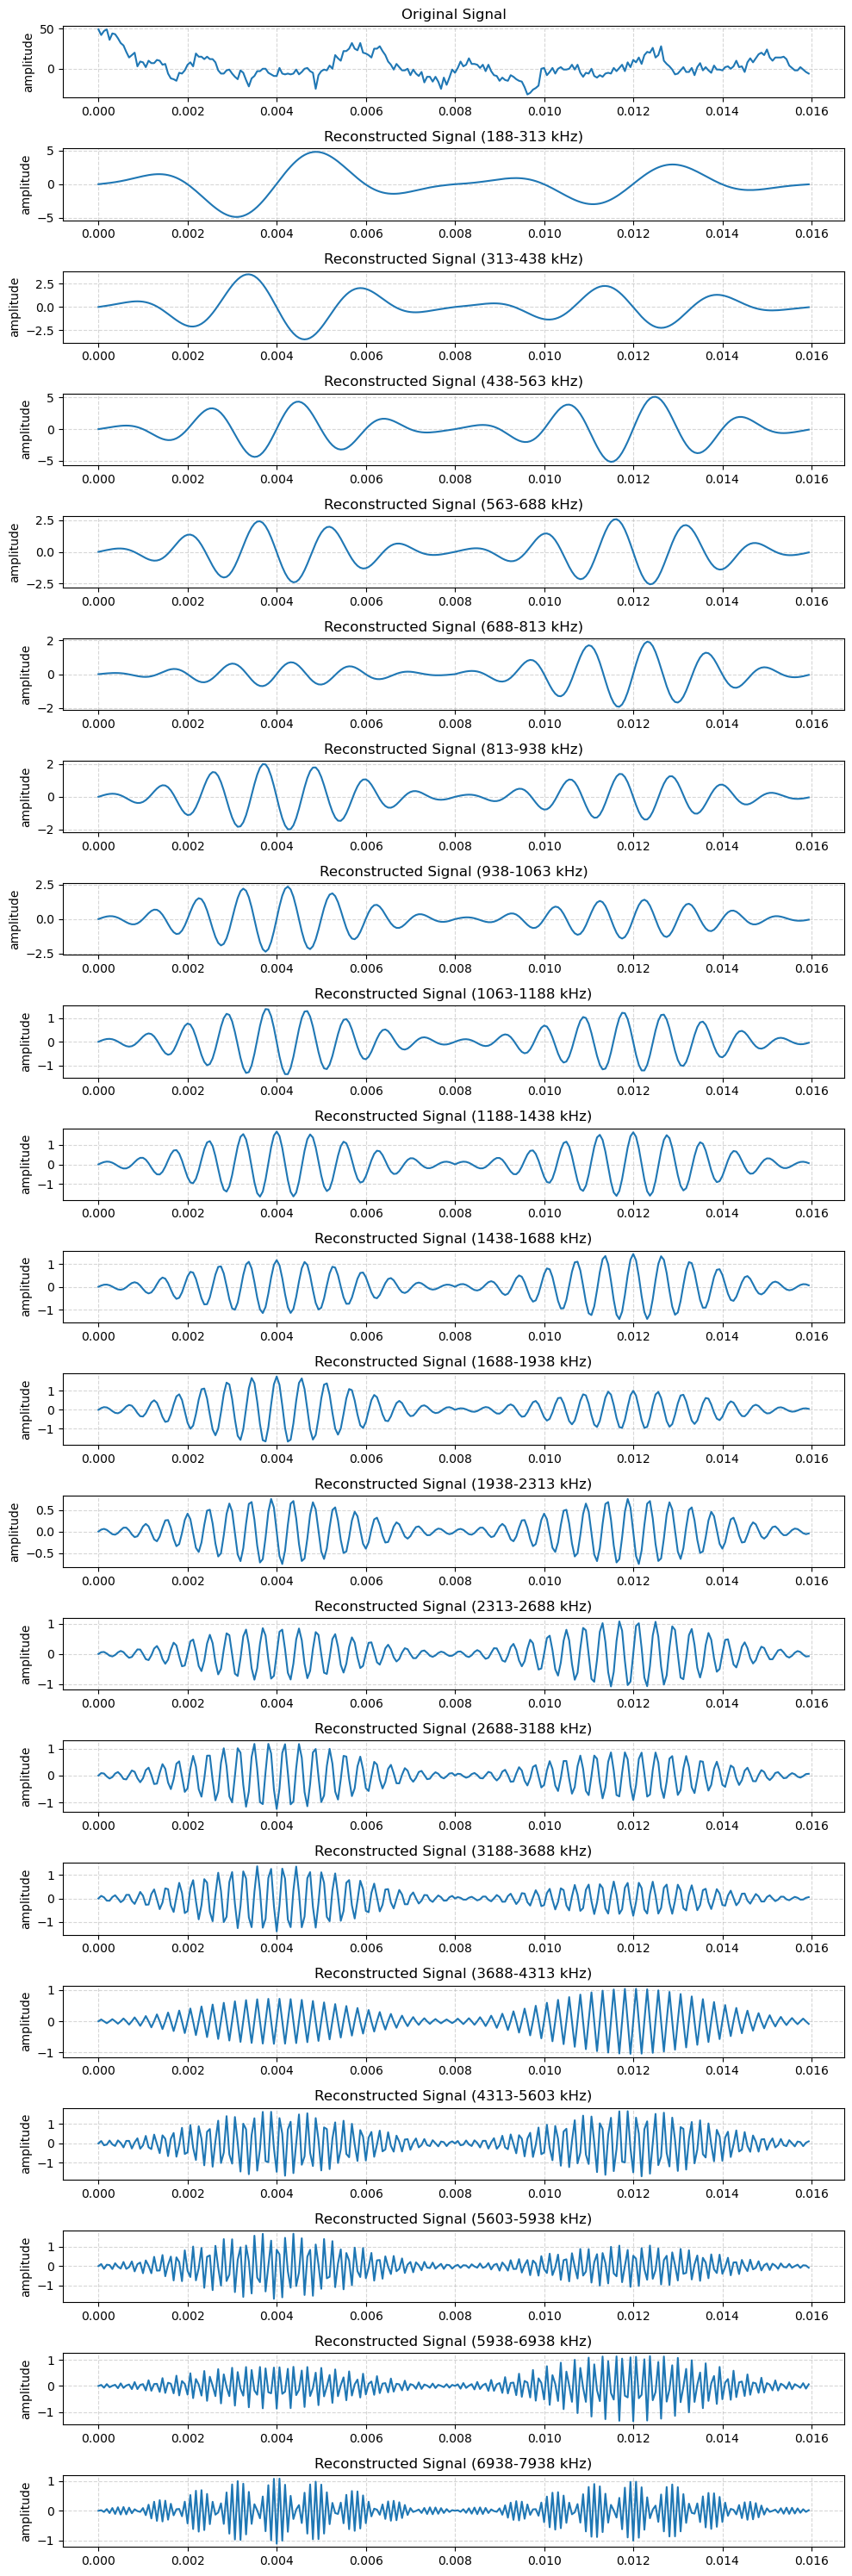

In [206]:
# plot sinusoid (reconstructed sound)
times_reconstructed = np.arange(len(signal[0]))/sample_rate
fig, axes = plt.subplots(len(signal)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times[:overlap_step*2], data[:overlap_step*2])
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Reconstructed Signal ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times_reconstructed[:overlap_step*2], signal[indx][:overlap_step*2])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

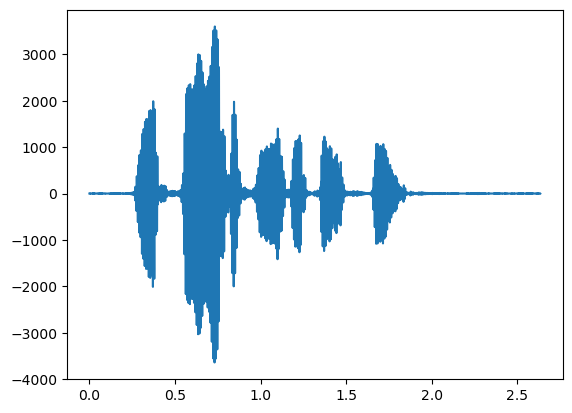

In [207]:
plt.plot(np.arange(len(signal[0]))/sample_rate, signal[0])
# plt.xlim(0.4, 0.42) # show a 20 ms snippet
plt.show()

In [208]:
signal_wav = sum(np.int16(signal))
print(signal_wav)
scipy.io.wavfile.write("reconstructed_sounds/"+wav_file[:-4]+"-"+input("How many channels?")+"channels_"+str(OVERLAP_MS)+"millisecondoverlap.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

[ 0  0  0 ... -1  6  3]
How many channels?22


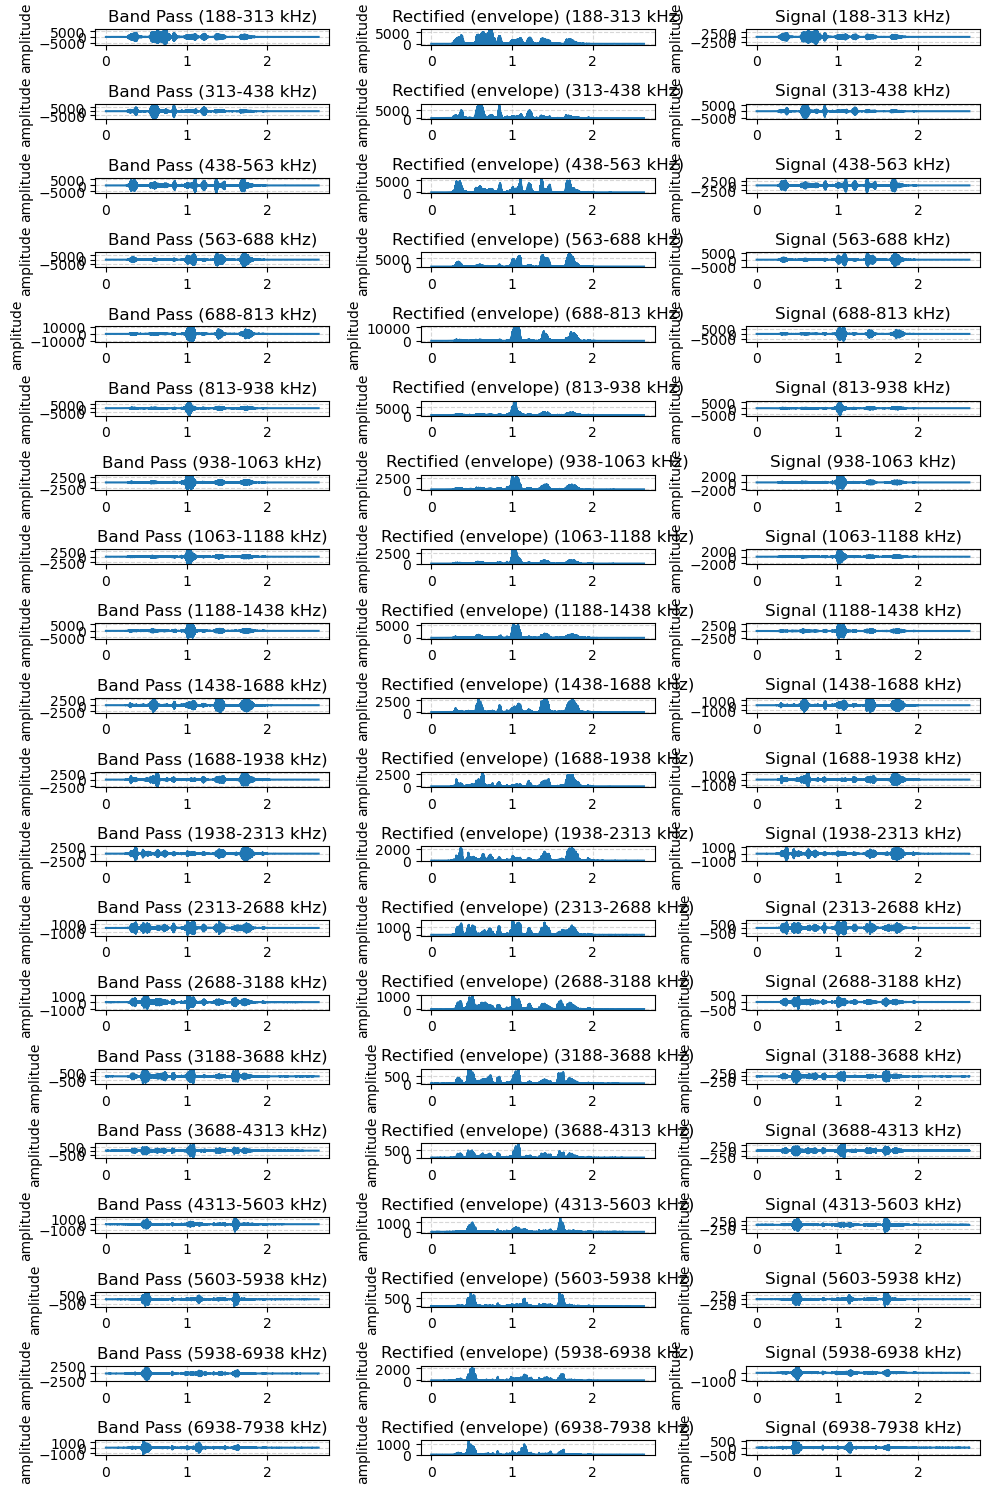

In [209]:
# plot all graphs together
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(len(signal), 3, figsize=(10, 15))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[indx, column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[indx, column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[indx, column_indx].plot(times, columns[column_indx][0][indx])
        axes[indx, column_indx].set_ylabel('amplitude')
#     break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

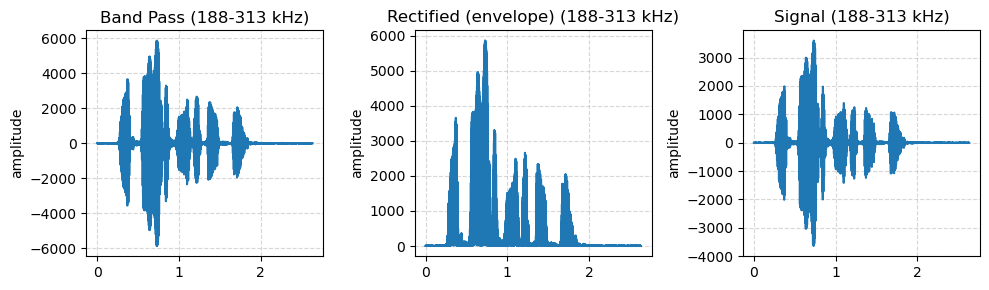

In [210]:
# plot one frequency range
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[column_indx].plot(times, columns[column_indx][0][indx])
        axes[column_indx].set_ylabel('amplitude')
    break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

# Comparing Speech Intelligibility with varying SNR, Noise, Reverb

In [ ]:
# learn about this formula
def signaltonoise(sound_data, axis=0, ddof=0):
    sound_data = np.asanyarray(sound_data)
    m = sound_data.mean(axis)
    sd = sound_data.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
# noise
# Load sample data from a WAV file
noise_file = "noised/train1-54065-B-45.wav"

noise_sample_rate, noise_data = scipy.io.wavfile.read(noise_file)
noised_times = np.arange(len(noise_data))/noise_sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(noise_data.shape)

print("sample_rate:", str(noise_sample_rate) + " samples/sec")

In [ ]:
# # for normalizing sound/equalizing the volume
# from pydub import AudioSegment, effects
# rawsound = AudioSegment.from_file(noise_file, "wav")  
# normalizedsound = effects.normalize(rawsound)  
# normalizedsound.export("./output1.wav", format="wav")

In [ ]:
snr_ratio = 1 # i think this is the formula because rms values = amplitude are in decibels

sample_rate, data = scipy.io.wavfile.read(wav_file)
data = noise_data[:len(data)]*(1/snr_ratio)+data
scipy.io.wavfile.write("noised/non_vocoded/noised_"+str(snr_ratio)+wav_file[:-4]+".wav", sample_rate, np.int16(data)) # have to transpose signal and combine all channels by adding

In [ ]:
# bandpass the data
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))
    
# rectify/get the envelope of each channel
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))
    
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

    # generate sinusoid (represents current?)
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    
signal_wav = sum(np.int16(signal))
_OVERLAP_MS = OVERLAP_MS
if _OVERLAP_MS >= LEN_TIME_QUANTIZED_MS:
    _OVERLAP_MS = 0
scipy.io.wavfile.write("noised/vocoded/"+wav_file[:-4]+"-"+input("How many channels?")+"channels_"+str(_OVERLAP_MS)+"millisecondoverlap"+str(snr_ratio)+"snr.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

In [ ]:
# reverb
# CHECK HERE FOR VIDEO TUTORIAL: https://www.youtube.com/watch?v=q63ypxds0cY 

# don't understand this below
# reverb: https://stackoverflow.com/questions/58345278/how-to-add-a-ratio-parameter-to-scipy-signal-convolution-in-python
def addReverb(data, ir_data, ratio=0.1):
    verb = np.abs(ir_data)
    verb = np.multiply(verb, 1.0/np.max(verb)) # make sure the highest value is 1
    verb = np.power(verb, 1.0/ratio) # a higher power makes the reverb die out more quickly
    verbed_data = scipy.signal.convolve(data, verb, method='fft')
    return verbed_data

In [ ]:
ir_data = np.genfromtxt('room_impulse_response_simulation.csv', delimiter=',') # simulated room using python, check https://www.youtube.com/watch?v=c3DTtc--_F4

In [ ]:
ratio = 2 # ratio of reverb added
sample_rate, data = scipy.io.wavfile.read(wav_file)
reverbed_data = np.int16(addReverb(data, ir_data, ratio))
data = reverbed_data
scipy.io.wavfile.write("reverbed/non_vocoded/reverbed_"+str(ratio)+wav_file[:-4]+".wav", sample_rate, data) # have to transpose signal and combine all channels by adding

In [ ]:
# bandpass the data
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))
    
# rectify/get the envelope of each channel
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))
    
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

    # generate sinusoid (represents current?)
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    
signal_wav = sum(np.int16(signal))
_OVERLAP_MS = OVERLAP_MS
if _OVERLAP_MS >= LEN_TIME_QUANTIZED_MS:
    _OVERLAP_MS = 0
scipy.io.wavfile.write("reverbed/vocoded/"+wav_file[:-4]+"-"+input("How many channels?")+"channels_"+str(_OVERLAP_MS)+"millisecondoverlap"+str(ratio)+"ratio.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

In [ ]:
reverbed_file = "reverbed.wav"
sample_rate, data = scipy.io.wavfile.read(reverbed_file)
if len(data.shape) >1:
    data = np.sum(data, axis=1)

In [ ]:
len(data)

In [ ]:
data

In [ ]:
original_data

In [ ]:
data.shape

In [ ]:
len(original_data.shape)

In [ ]:
_, original_data = scipy.io.wavfile.read(wav_file)
stoi_score = stoi(original_data, data, sample_rate, extended=False)

In [ ]:
stoi_score # 2 snr ratio

In [ ]:
'''
stoi_score 
# 7 snr ratio: 0.9834504422825294
# 2 snr ratio: 0.9018485935582558
# 1 snr ratio: 0.8285867920845408

'''

In [ ]:
import pyroomacoustics as pra

# The desired reverberation time and dimensions of the room
rt60 = 0.5  # seconds
room_dim = [9, 7.5, 3.5]  # meters

# We invert Sabine's formula to obtain the parameters for the ISM simulator
e_absorption, max_order = pra.inverse_sabine(rt60, room_dim)

# Create the room
room = pra.ShoeBox(
    room_dim, fs=sample_rate, materials=pra.Material(e_absorption), max_order=max_order
)

In [ ]:
# add sound source to room
room.add_source([2.5, 3.73, 1.76], signal=data, delay=0)

In [ ]:
# add microphones to room
mic_locs = np.c_[
    [6.3, 4.87, 1.2],  # mic 1
    [6.3, 4.93, 1.2],  # mic 2
]

# finally place the array in the room
room.add_microphone_array(mic_locs)

In [ ]:
# Display Room in 2D

fig, ax = room.plot(img_order=2)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 8])

In [ ]:
room.compute_rir()

# plot the RIR between mic 1 and source 0
import matplotlib.pyplot as plt
plt.plot(room.rir[1][0])
plt.show()

In [ ]:
room.simulate()

# plot signal at microphone 1
plt.plot(room.mic_array.signals[1,:])

In [ ]:
# sample code all together

# The desired reverberation time and dimensions of the room
rt60_tgt = 0.3  # seconds
room_dim = [10, 7.5, 3.5]  # meters


# We invert Sabine's formula to obtain the parameters for the ISM simulator
e_absorption, max_order = pra.inverse_sabine(rt60_tgt, room_dim)

# Create the room
room = pra.ShoeBox(
    room_dim, fs=sample_rate, materials=pra.Material(e_absorption), max_order=max_order
)

# place the source in the room
room.add_source([2.5, 3.73, 1.76], signal=data, delay=0.5)

# define the locations of the microphones
mic_locs = np.c_[
    [6.3, 4.87, 1.2], [6.3, 4.93, 1.2],  # mic 1  # mic 2
]

# finally place the array in the room
room.add_microphone_array(mic_locs)

# Run the simulation (this will also build the RIR automatically)
room.simulate()


In [ ]:

room.mic_array.to_wav(
    f"examples/samples/guitar_16k_reverb_{args.method}.wav",
    norm=True,
    bitdepth=np.int16,
)

# measure the reverberation time
rt60 = room.measure_rt60()
print("The desired RT60 was {}".format(rt60_tgt))
print("The measured RT60 is {}".format(rt60[1, 0]))

# Create a plot
plt.figure()

# plot one of the RIR. both can also be plotted using room.plot_rir()
rir_1_0 = room.rir[1][0]
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(rir_1_0)) / room.fs, rir_1_0)
plt.title("The RIR from source 0 to mic 1")
plt.xlabel("Time [s]")

# plot signal at microphone 1
plt.subplot(2, 1, 2)
plt.plot(room.mic_array.signals[1, :])
plt.title("Microphone 1 signal")
plt.xlabel("Time [s]")

plt.tight_layout()
plt.show()